In [126]:
import kagglehub
import json
import cv2
#from google.colab.patches import cv2_imshow
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf

In [14]:
path = kagglehub.dataset_download("pkdarabi/brain-tumor-image-dataset-semantic-segmentation")
print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 83.7M/83.7M [00:04<00:00, 20.3MB/s]

Extracting files...


Path to dataset files: C:\Users\tyler\.cache\kagglehub\datasets\pkdarabi\brain-tumor-image-dataset-semantic-segmentation\versions\1


In [71]:
#!mkdir C:\Users\tyler\content\brain_tumor_dataset
#!robocopy C:\Users\tyler\.cache\kagglehub\datasets\pkdarabi\ C:\Users\tyler\content\brain_tumor_dataset /e
print("already done")

already done


In [110]:
image = cv2.imread(r"C:\Users\tyler\.cache\kagglehub\datasets\pkdarabi\brain-tumor-image-dataset-semantic-segmentation\versions\1\train\1000_jpg.rf.1c16148495900a466a53f121ec6af0a9.jpg")
print(image.shape)
print(type(image))
window_name = 'image'

# Displaying the image
cv2.imshow(window_name, image)

# waits for user to press any key
cv2.waitKey(0)

# closing all open windows
cv2.destroyAllWindows()

(640, 640, 3)
<class 'numpy.ndarray'>


In [113]:
with open(r"C:\Users\tyler\content\brain_tumor_dataset\brain-tumor-image-dataset-semantic-segmentation\versions\1\train\_annotations.coco.json", 'r') as file:
    data = json.load(file)
data.keys()

data['annotations'][1000]

{'id': 1000,
 'image_id': 1000,
 'category_id': 1,
 'bbox': [365, 336, 77.5, 76.25],
 'area': 5909.375,
 'segmentation': [[442.5,
   336.25,
   365,
   336.25,
   365,
   412.5,
   442.5,
   412.5,
   442.5,
   336.25]],
 'iscrowd': 0}

In [104]:
data['images'][0]

{'id': 0,
 'license': 1,
 'file_name': '2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg',
 'height': 640,
 'width': 640,
 'date_captured': '2023-08-19T04:37:54+00:00'}

In [121]:
# Paths
annotationPath = r"C:\Users\tyler\content\brain_tumor_dataset\brain-tumor-image-dataset-semantic-segmentation\versions\1\train\_annotations.coco.json"
imagesDir = r"C:\Users\tyler\content\brain_tumor_dataset\brain-tumor-image-dataset-semantic-segmentation\versions\1\train"

#Specify ID of image
singleImageID = 10

# Load COCO annotations
cocoAnnotations = COCO(annotationPath)

# Load single image info and read the image
imgInfo = cocoAnnotations.loadImgs(singleImageID)[0]
imgPath = imagesDir + '/' + imgInfo['file_name']
print(f'Path of image selected -- {imgPath}')
img = cv2.imread(imagesDir + '/' + imgInfo['file_name'])
height, width = image.shape[:2]
print(f'Image dimensions -- {height} x {width}')

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Path of image selected -- C:\Users\tyler\content\brain_tumor_dataset\brain-tumor-image-dataset-semantic-segmentation\versions\1\train/2433_jpg.rf.3cdf8e4cb3a08e9b2fccc6c6082c2344.jpg
Image dimensions -- 640 x 640


In [119]:
# Initiate an empty mask
mask = np.zeros((height, width), dtype=np.uint8)

# Get all annotations for the specified image (generally images can have multiple annotations)
annotationID = cocoAnnotations.getAnnIds(imgIds=singleImageID)
annotation = cocoAnnotations.loadAnns(annotationID)

annotation[0]['segmentation']
print(annotation)

[{'id': 10, 'image_id': 10, 'category_id': 1, 'bbox': [218, 225, 110, 98.75], 'area': 10862.5, 'segmentation': [[327.5, 225, 217.5, 225, 217.5, 323.75, 327.5, 323.75, 327.5, 225]], 'iscrowd': 0}]


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Path of image selected -- C:\Users\tyler\content\brain_tumor_dataset\brain-tumor-image-dataset-semantic-segmentation\versions\1\train/1344_jpg.rf.e1cb3904d087eaf4a854738d936a6477.jpg
Image dimensions -- 640 x 640


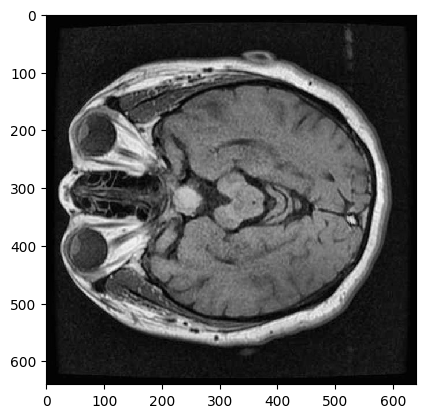

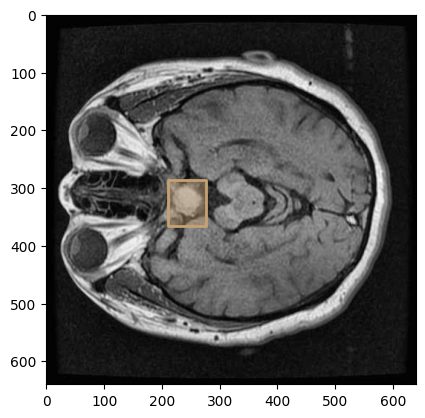

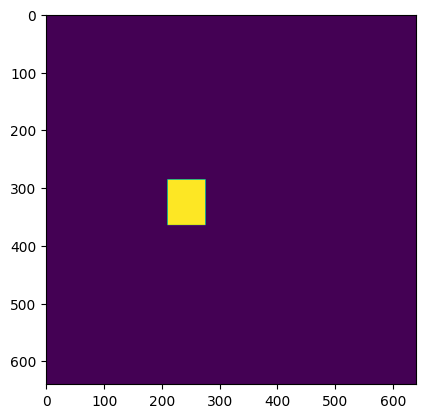

In [155]:
"""
def load_image(img, segmentation):
  input_image = tf.image.resize(img, (128, 128))
  input_mask = tf.image.resize(
    segmentation,
    (128, 128),
    method = tf.image.ResizeMethod.NEAREST_NEIGHBOR,
  )

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

load_image(img, annotation[0]['segmentation'])
"""

# Paths
annotationPath = r"C:\Users\tyler\content\brain_tumor_dataset\brain-tumor-image-dataset-semantic-segmentation\versions\1\train\_annotations.coco.json"
imagesDir = r"C:\Users\tyler\content\brain_tumor_dataset\brain-tumor-image-dataset-semantic-segmentation\versions\1\train"

# Specify ID of image
singleImageID = 465

# Load COCO annotations
cocoAnnotations = COCO(annotationPath)

# Load single image info and read the image
imgInfo = cocoAnnotations.loadImgs(singleImageID)[0]
imgPath = imagesDir + '/' + imgInfo['file_name']
print(f'Path of image selected -- {imgPath}')
img = cv2.imread(imagesDir + '/' + imgInfo['file_name'])
height, width = image.shape[:2]
print(f'Image dimensions -- {height} x {width}')

# plot unannotated image
image = np.array(Image.open(imgPath))
plt.imshow(image, interpolation='nearest')
plt.show()

# plot annotations on image
plt.imshow(image)
cat_ids = cocoAnnotations.getCatIds()
anns_ids = cocoAnnotations.getAnnIds(imgIds=singleImageID, catIds=cat_ids, iscrowd=None)
anns = cocoAnnotations.loadAnns(anns_ids)
cocoAnnotations.showAnns(anns)
plt.show()

# create mask from annotations
mask = cocoAnnotations.annToMask(anns[0])
for i in range(len(anns)):
    mask += cocoAnnotations.annToMask(anns[i])

plt.imshow(mask)
plt.show()